### CS4423 - Networks
Angela Carnevale<br/>
School of Mathematical and Statistical Sciences<br/>
University of Galway

#### 1. Graphs and Graph Theory


# Week 3, Lecture 1: 
# Graphs, Relations and Matrices. Bipartite Graphs.

 Together with `networkx`, we import `numpy` for matrix operations.

In [2]:
import networkx as nx
import numpy as np
opts={'with_labels':True,'node_color':'y'}

## Graphs are Relations

We have seen that graphs can be interpreted as relations with certain properties:

A **simple** graph with node set $X$ is a **symmetric**, **irreflexive** relation on $X$. 

The relation on the nodes that of *being adjacent*.  

The **adjacency matrix** of a graph is a special case of adjacency matrix of a relation.


## Composition and Adjacency Matrices.

* Relations can be composed, like functions.  

* If $R$ is a relation
from a set $X$ to a set $Y$, and if $S$ is a relation from $Y$ to a set $Z$,
then the __composite relation__ $R \circ S$ is the relation
from $X$ to $Z$, defined by $x (R \circ S) z$ if there is a
an element $y \in Y$ such that $x R y$ and $y S z$.

* The adjacency matrix of the composite relation $R \circ S$
is *essentially* the (matrix) product of the adjacency matrices
of the individual relations $R$ and $S$. 

Let's see how this works in practice...

We'll construct two relations starting from (part of) the data gathered through our survey on TV shows watched. 

By the way, here's a summary of the results:

![TV survey summary](images/tv.png)

... and here's a list of the responses in the form of an adjacency list that can be read by `networkx` to construct a graph:

In [3]:
!cat data/tv.adj

1	DG Wed CF NP FT 
2	DG Wed BCS FT 
3	DG Wed Sand HB Mand FT NP 
4	DG FT NP 
5	DG FT NP 
6	Wed Mand FT 
7	BCS FT 
8	DG Wed HB FT NP 
9	FT DG NP 
10	DG Wed CF NP FT 
11	BCS FT 
12	FT BCS HB 
13	DG NP 
14	DG Wed Mand 
15	DG Wed BCS HB FT 
16	DG FT Mand HB BCS Sand 
17	RoP Sand Mand HB 
18	DG Wed Sand HB FT NP 
19	BCS HB Mand FT 
20	Wed BCS HB Mand 
21	DG Bear Wed FT NP 
22	DG RoP BCS HB FT NP 
23	DG Wed Mand FT Sand 
24	DG HB FT 
25	RoP Mand FT 
26	DG FT Mand Wed 
27	BCS Mand FT 
28	DG HB FT NP 
29	Mand RoP 
30	DG 
31	DG Wed FT 
32	Wed FT NP 
33	NP FT HB BCS DG 
34	DG Wed FT NP 
35	DG FT NP 
36	DG FT NP 
37	DG RoP FT NP 
38	BCS 
39	FT DG 
40	BCS Mand FT 
41	FT 
42	RoP Sand BCS FT 
43	FT HB BCS 


Let's start by looking at a smaller sample of responses. Consider 

* $X_{10}=\{1,2,\dots,9,10\}$ the set of the first 10 respondents, and 
* $Y=\{DG, RoP, W, Bear, Wed, CF, Sand, BCS, HB, Mand, FT, NP\}$ the set of TV shows under consideration.

On  $X_{10}\times Y$ we can consider the relation $R$ given by $xRy$ if student $x$ watched show $y$. The corresponding adjacency matrix (obtained from the data from our survey restricted to $X_{10}$) is

$$ A=\begin{bmatrix}
1&0&0&0&1&1&0&0&0&0&1&1\\
1&0&0&0&1&0&0&1&0&0&1&0\\
1&0&0&0&1&0&1&0&1&1&1&1\\
1&0&0&0&0&0&0&0&0&0&1&1\\
1&0&0&0&0&0&0&0&0&0&1&1\\
0&0&0&0&1&0&0&0&0&1&1&0\\
0&0&0&0&0&0&0&1&0&0&1&0\\
1&0&0&0&1&0&0&0&1&0&1&1\\
1&0&0&0&0&0&0&0&0&0&1&1\\
1&0&0&0&1&1&0&0&0&0&1&1
\end{bmatrix}$$

(here rows are indexed by elements of $X$ and columns by elements of $Y$).

Here's our adjacency matrix as a `numpy` array

In [4]:
A=np.array([[1,0,0,0,1,1,0,0,0,0,1,1],
            [1,0,0,0,1,0,0,1,0,0,1,0],
            [1,0,0,0,1,0,1,0,1,1,1,1],
            [1,0,0,0,0,0,0,0,0,0,1,1],
            [1,0,0,0,0,0,0,0,0,0,1,1],
            [0,0,0,0,1,0,0,0,0,1,1,0],
            [0,0,0,0,0,0,0,1,0,0,1,0],
            [1,0,0,0,1,0,0,0,1,0,1,1],
            [1,0,0,0,0,0,0,0,0,0,1,1],
            [1,0,0,0,1,1,0,0,0,0,1,1]])
print(A)

[[1 0 0 0 1 1 0 0 0 0 1 1]
 [1 0 0 0 1 0 0 1 0 0 1 0]
 [1 0 0 0 1 0 1 0 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [0 0 0 0 1 0 0 0 0 1 1 0]
 [0 0 0 0 0 0 0 1 0 0 1 0]
 [1 0 0 0 1 0 0 0 1 0 1 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 0 0 0 1 1 0 0 0 0 1 1]]


What if we compose the relation $R:X\to Y$ with its *transpose* $R^T:Y\to X$? 

The transpose of the relation $R$ is simply the one that has $A^T$ as adjacency matrix. So at the level of matrices, this means multiplying $A$ by $A^T$, which we can do in `numpy` as follows:

In [5]:
B=A@A.transpose()
print(B)

[[5 3 4 3 3 2 1 4 3 5]
 [3 4 3 2 2 2 2 3 2 3]
 [4 3 7 3 3 3 1 5 3 4]
 [3 2 3 3 3 1 1 3 3 3]
 [3 2 3 3 3 1 1 3 3 3]
 [2 2 3 1 1 3 1 2 1 2]
 [1 2 1 1 1 1 2 1 1 1]
 [4 3 5 3 3 2 1 5 3 4]
 [3 2 3 3 3 1 1 3 3 3]
 [5 3 4 3 3 2 1 4 3 5]]


How can we interpret the entries of the above matrix in terms of TV shows and respondents?

We've seen that for two relations $R$ and $S$ that can be composed,

* If $A = (a_{ij})$ is the adjacency matrix of $R$, and $B = (b_{jk})$ the adjacency matrix of $S$,
then the $i,k$-entry of the product $AB$ is
$$(AB)_{ik} = \sum_{j} a_{ij} b_{jk},$$
which is exactly the __number__ of elements $y \in Y$ such that $x_i R
y$ and $y S z_k$.  




* This tells us that all it needs for $x_i$ to be $(R \circ S)$-related
to $z_k$ is this number to be at least $1$.  

* Hence, replacing all
nonzero entries in the product matrix $AB$ with $1$ yields the
adjacency matrix of the composite $R \circ S$.

* In our case, the entry in position $(i,j)$ is **exactly the number of shows in common between the $i$th and $j$th respondent**.

* In particular, the entry in position $(i,i)$ tells us how many shows were watched by participant number $i$.

* We can use the observation above to transform the matrix $B$ into an adjacency matrix of a graph.

* In `numpy`, one can use **boolean indexing** and other convenient methods to do so.

First, we simply replace all the entries of $B$ which are stricly greater than $1$ with $1$s:

In [6]:
B[B>1]=1
print(B)

[[1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]]


Then, we fill the diagonal with zeros:

In [7]:
np.fill_diagonal(B,0)
print(B)

[[0 1 1 1 1 1 1 1 1 1]
 [1 0 1 1 1 1 1 1 1 1]
 [1 1 0 1 1 1 1 1 1 1]
 [1 1 1 0 1 1 1 1 1 1]
 [1 1 1 1 0 1 1 1 1 1]
 [1 1 1 1 1 0 1 1 1 1]
 [1 1 1 1 1 1 0 1 1 1]
 [1 1 1 1 1 1 1 0 1 1]
 [1 1 1 1 1 1 1 1 0 1]
 [1 1 1 1 1 1 1 1 1 0]]


The above matrix is the adjacency matrix of the composite relation. It tells us something about the **common interests** of the $10$ actors under consideration: there is a $1$ in position $(i,j)$ if and only if the $i$th respondent and the $j$th respondent share at least one show on their watchlist. Here, as expected, every pair of respondents had at least one show in common (we've seen that all first ten participants have watched Father Ted!)

This is now the adjacency matrix of a homogeneous relation (on $X_{10}$) and we can therefore construct a graph. We'll do so directly from our `numpy` adjacency matrix.

In [ ]:
G=nx.from_numpy_matrix(B)

In [ ]:
nx.draw(G,**opts)

A graph like this one, representing the patterns of intersections of a family of sets, is also known as an [**intersection graph**](https://en.wikipedia.org/wiki/Intersection_graph). We'll encounter this graph in a different guise soon.

Note that we could have used the *transpose* construction (that is, we could have taken $R^T\circ R$):

In [ ]:
C=A.transpose()@A
print(C)

* This time, the $(i,j)$ entry of the matrix tells us the number of people that have watched both the $i$th and the $j$th show. For instance:
  * two people watched both Conversations with Friends and Normal People ($c_{6,12}=c_{12,6}=2$)
  * one person watched both Wednesday and Better Call Saul ($c_{5,8}=c_{8,5}=1$)...
* Entry $(i,i)$  is the number of people (among the first ten respondents) that watched the $i$th show on our list.

As an exercise, you could construct an adjacency matrix and corresponding graph from the matrix $C$ (see also below).

## Bipartite Graphs

Affiliation networks are convenient ways to represent and store information like that we gathered through our survey. Mathematically, these are are bipartite graphs. Let's see/recall some of their important features.

A (simple) graph $G = (X, E)$ is called **bipartite**, if the vertex set $X$ is a disjoint union
of two sets $X_1$ and $X_2$ so that each edge in $E$ links a vertex in $X_1$ with a vertex in $X_2$. 

We can think of the vertices in the two sets as **coloured** with different colours. For instance, we can think of nodes in $X_1$ as white nodes and those in $X_2$ as black nodes.

Here is a sample bipartite graph $B$, specified to the `Graph` constructor by its edge list.

In [ ]:
edges = [(0,5), (1,5), (1,6), (1,7), (1,8), 
  (2,8), (3,5), (3,9), (4,7), (4,8), (4,9)]
B = nx.Graph(edges)
nx.draw(B, **opts)

In this graph, the **white** nodes can be taken  as the set $X_1 = \{0,1,2,\dots,4\}$ 
and the **black** nodes as $X_2 = \{5,6,\dots,9\}$.
The drawing command `nx.draw` takes as optional argument a dictionary `pos` that specifies for
each node a (relative) position in the drawing.  Here, the node is the key and the 
position is a pair of $x$,$y$-coordinates.  In this example we can use the (integer) quotient
and remainder, as returned by the python method `divmod` to quickly compute a dictionary of positions
that have the white nodes on the left, and the black nodes on the right.

In [ ]:
divmod(7, 5)

In [ ]:
pos = {x: divmod(x, 5) for x in range(10)}
print(pos)

In [ ]:
nx.draw(B, pos, **opts)

Node colors can be specified as a *list* assigned to the keyword argument `node_color`.  We can use the $x$-coordinates of the node positions for that purpose.

In [ ]:
color = [pos[x][0] for x in B.nodes()]
color

In [ ]:
print(B.nodes)

In [ ]:
opts2 = { "with_labels": True, "node_color": color, "font_color": 'r' }
nx.draw(B, **opts2)

In [ ]:
nx.draw(B, pos, **opts2)

A **(vertex)-coloring** of a graph $G$ is an assignment of (finitely many) colors to the nodes of $G$,
so that any two nodes which are connected by an edge have *different* colors.

A graph is called **$N$-colorable**, if it has a vertex coloring with (at most) $N$ colors.

**Theorem.** Let $G$ be a graph.  The following are equivalent:

* $G$ is bipartite;

* $G$ is $2$-colorable;
 
* each cycle in $G$ has even length.

(We'll give precise definitions of **cycle** and **length** in a bit)



2D grids are naturally bipartite:

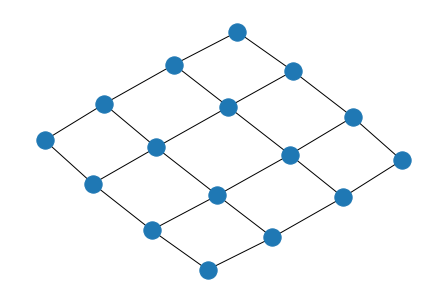

In [10]:
G44 = nx.grid_2d_graph(4, 4)
nx.draw(G44)

How would you find a $2$-coloring of this graph?

The method `nx.bipartite.color` determines a $2$-coloring of a graph $G$ algorithmically, if it exists, i.e. if
$G$ is bipartite.

In [13]:
color = nx.bipartite.color(G44)
color

{(0, 0): 1,
 (1, 0): 0,
 (0, 1): 0,
 (1, 1): 1,
 (0, 2): 1,
 (1, 2): 0,
 (0, 3): 0,
 (1, 3): 1,
 (2, 3): 0,
 (3, 3): 1,
 (2, 2): 1,
 (3, 2): 0,
 (2, 1): 0,
 (3, 1): 1,
 (2, 0): 1,
 (3, 0): 0}

This won't work on a graph that is not $2$-colorable:

In [8]:
nx.bipartite.color(nx.complete_graph(3))

NetworkXError: Graph is not bipartite.

In [14]:
color = [color[x] for x in G44.nodes()]
color

[1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1]

In [15]:
opts2 = { "with_labels": True, "node_color":color, "font_color":'r' }

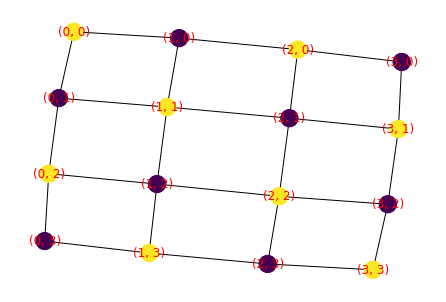

In [16]:
nx.draw(G44, **opts2)

Note how the nodes are labelled in a $2D$ grid in `networkx`...

In [ ]:
G44.nodes()

##  Code Corner

### `python`

* `divmod`: [[doc]](https://docs.python.org/3/library/functions.html#divmod) the built-in quotient-and-remainder

In [ ]:
divmod(-7, 5)

### `Numpy`

* `toarray`:  convert a sparse matrix into a proper array

* `fill_diagonal`: fill the diagonal entries of an array with a given value.

### `networkx`

* `adjacency_matrix` computes the adjacency matrix of a graph

  * `from_numpy_matrix` constructs a graph from its adjacency matrix

##  Exercises

1. Use the `complete_graph` function in `networkx` to construct a $5 \times 5$ matrix
   with entries $0$ on the diagonal and all other entries $1$.

2. Construct an adjacency matrix and a graph from the matrix $C$ above. What does it mean for two vertices in this graph to be adjacent at the level of the TV shows?